In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\A2010578\OneDrive\Github\EBA-3500\solutions\applied':
  os.chdir(r'C:\Users\A2010578\OneDrive\Github\EBA-3500\solutions\applied')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\A2010578\AppData\Local\Temp\ipykernel_14752\3914090056.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Pyth

In [2]:
import pandas as pd
import numpy as np
wage = pd.read_csv("data/Wage.csv")
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
wage.sort_values(by = "age", inplace = True)
x = wage["age"].to_numpy()
y = wage["wage"]

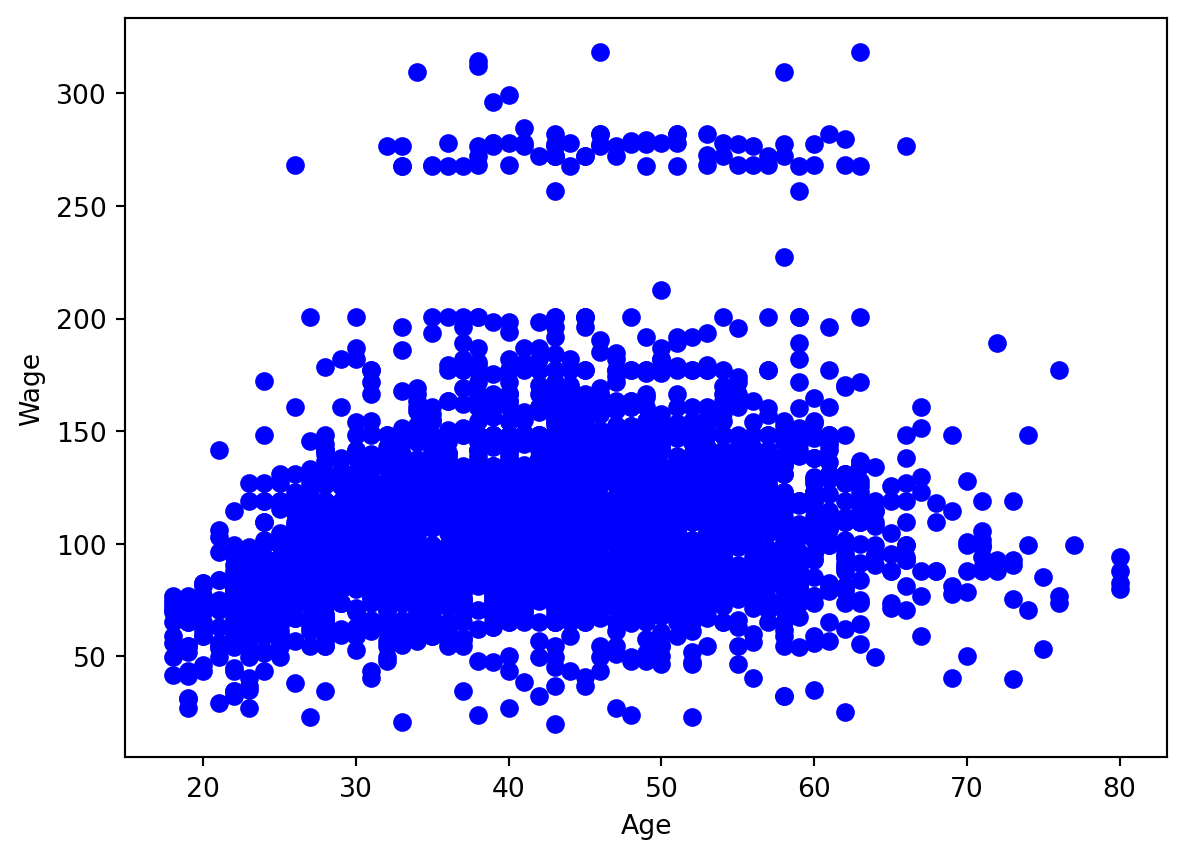

In [4]:
import matplotlib.pylab as plt
plt.plot(x,y,"bo")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
X2 = PolynomialFeatures(2).fit_transform(x.reshape(-1,1))
X2

array([[1.00e+00, 1.80e+01, 3.24e+02],
       [1.00e+00, 1.80e+01, 3.24e+02],
       [1.00e+00, 1.80e+01, 3.24e+02],
       ...,
       [1.00e+00, 8.00e+01, 6.40e+03],
       [1.00e+00, 8.00e+01, 6.40e+03],
       [1.00e+00, 8.00e+01, 6.40e+03]])

In [6]:
from sklearn.linear_model import LinearRegression as LinReg
LinReg().fit(X2, y).score(X2,y)

0.08208514643412512

In [7]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(LinReg(), X2, y, cv=10)
r2 = cv_results.mean()
r2

-0.020633875020031178

In [8]:
def cv_poly(degree):
  X = PolynomialFeatures(degree).fit_transform(x.reshape(-1,1))
  return cross_val_score(LinReg(), X, y, cv=10, scoring="neg_mean_squared_error").mean()

In [9]:
cvs = {k:cv_poly(k) for k in range(0,6)}
cvs

{0: -1772.307761255189,
 1: -1760.3023113572544,
 2: -1644.5695670963446,
 3: -1612.9337142023292,
 4: -1963.3419909645193,
 5: -3406.2151997287}

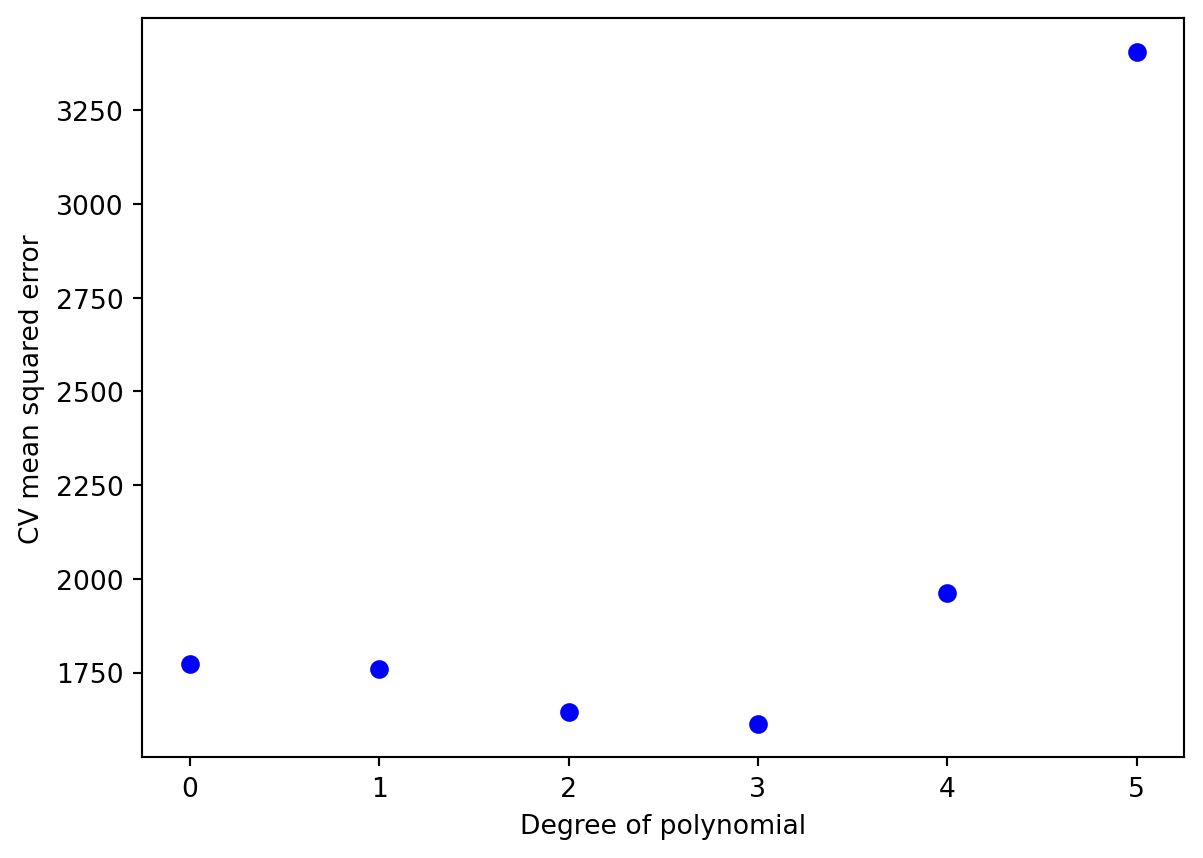

In [10]:
import matplotlib.pylab as plt
plt.plot(cvs.keys(), -np.array(list(cvs.values())), "bo")
plt.xlabel("Degree of polynomial")
plt.ylabel("CV mean squared error")
plt.show()

In [11]:
X3 = PolynomialFeatures(3).fit_transform(x.reshape(-1,1))
fit = LinReg().fit(X3, y)

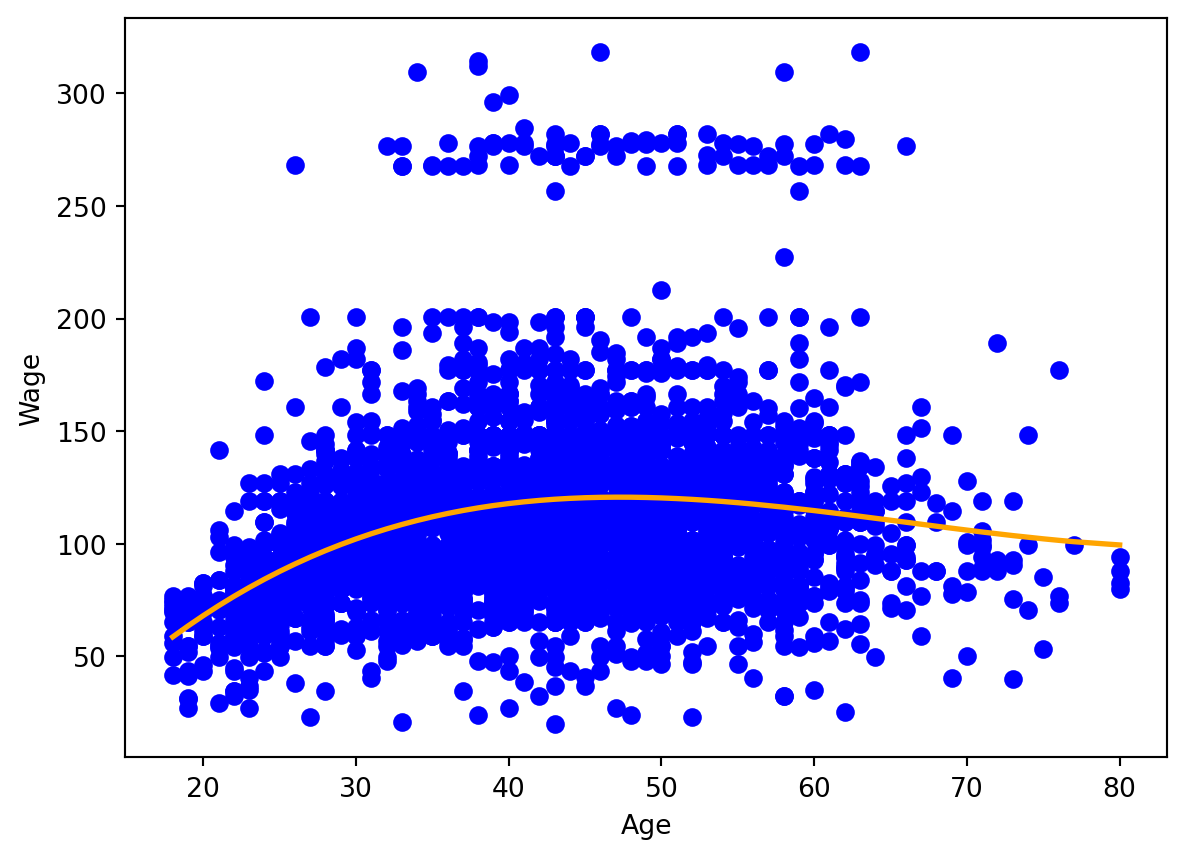

In [12]:
import matplotlib.pylab as plt
plt.plot(x,y,"bo")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.plot(x, fit.predict(X3), linewidth =2, color = "orange")
plt.show()

In [13]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(
    n_bins=5, encode='onehot-dense', strategy='uniform'
)
est.fit(x.reshape(-1, 1))
X = est.transform(x.reshape(-1, 1))
fitter = LinReg().fit(X,y)

C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


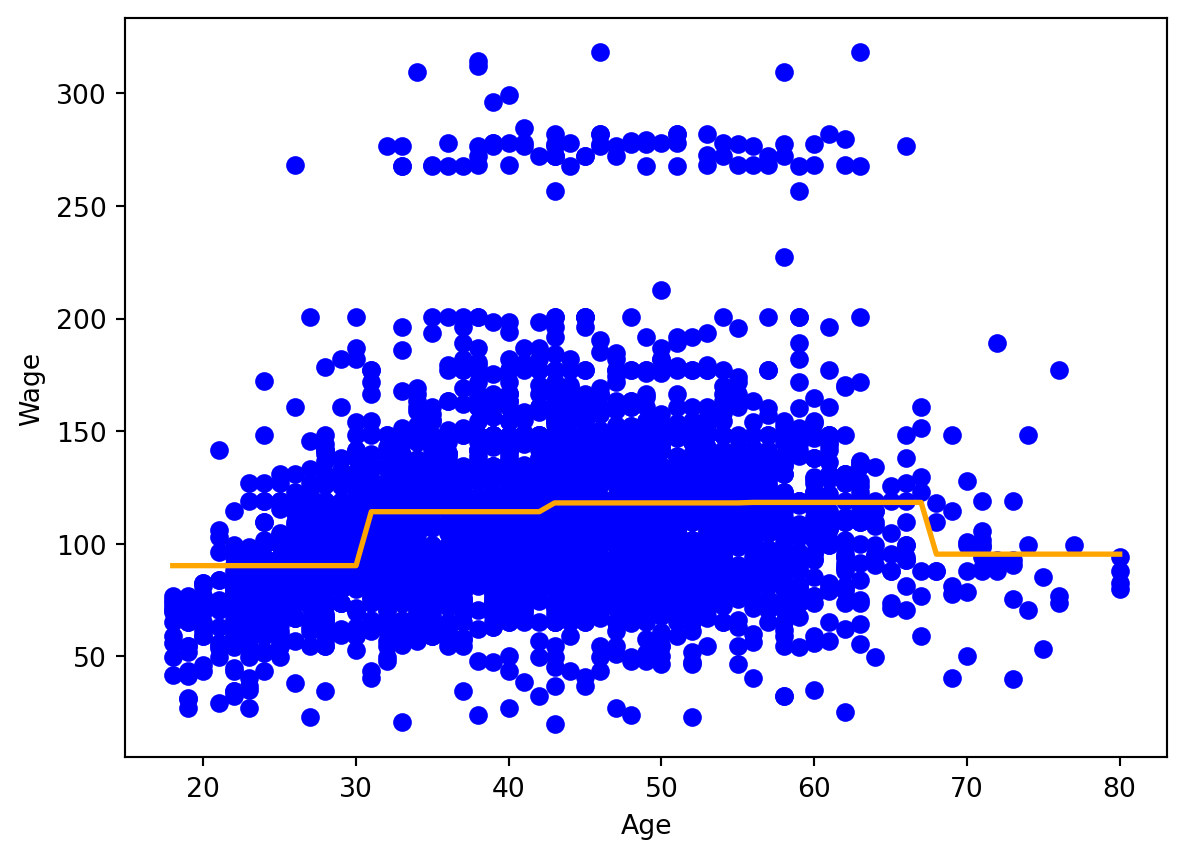

In [14]:
import matplotlib.pylab as plt
plt.plot(x,y,"bo")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.plot(x, fitter.predict(X), linewidth =2, color = "orange")
plt.show()

In [15]:
def cv_step(n_bins):
  est = KBinsDiscretizer(
    n_bins=n_bins, encode='onehot-dense', strategy='uniform'
  )
  est.fit(x.reshape(-1, 1))
  X = est.transform(x.reshape(-1, 1))
  return cross_val_score(LinReg(), X, y, cv=10, scoring="neg_mean_squared_error").mean()

cvs = {k:cv_step(k) for k in range(2,20)}

C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling exp

C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling exp

C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling exp

In [16]:
(-np.array(list(cvs.values()))).argmin()

0

C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling exp

C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling exp

C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\A2010578\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling exp

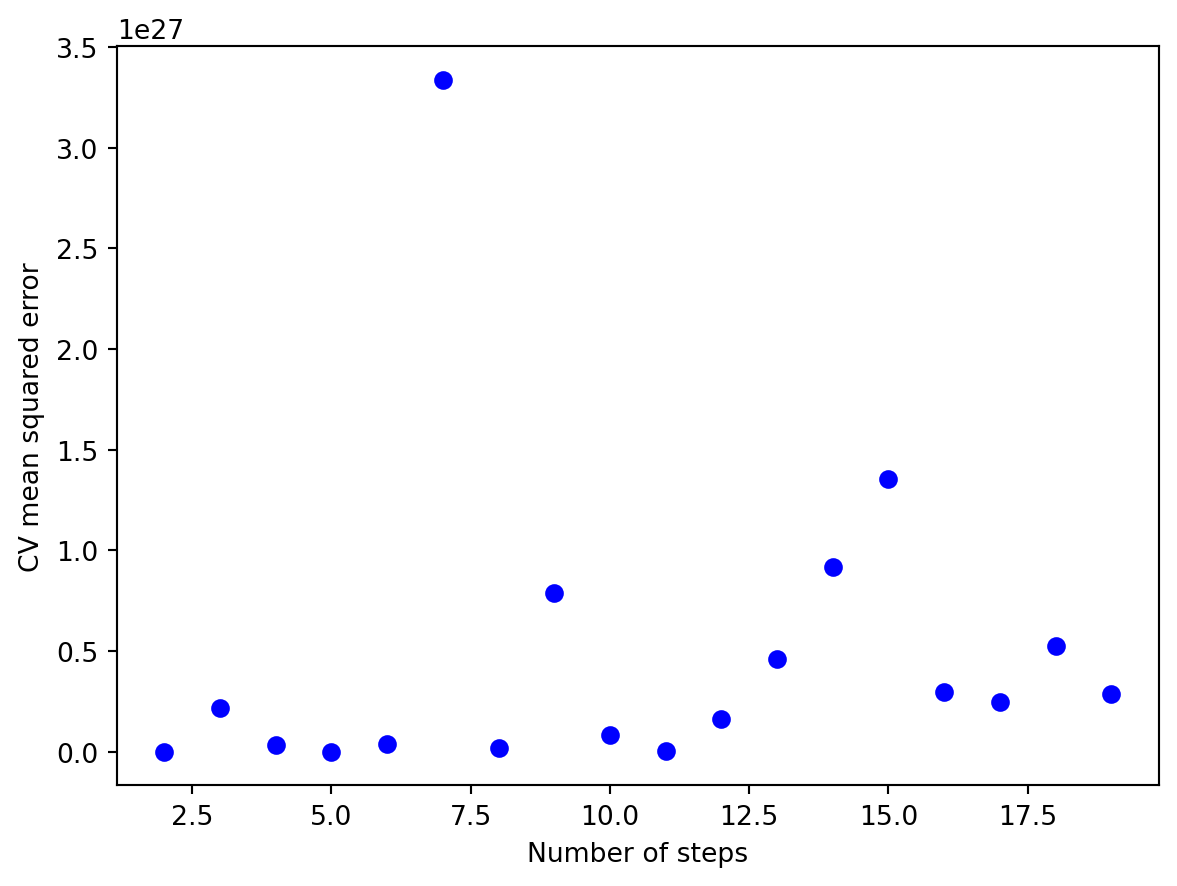

In [17]:
import numpy as np
import matplotlib.pylab as plt
cvs = {k:cv_step(k) for k in range(2,20)}
plt.plot(cvs.keys(), -np.array(list(cvs.values())), "bo")
plt.xlabel("Number of steps")
plt.ylabel("CV mean squared error")
plt.show()